# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [2]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [26]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/dataset/marketing_campaign.csv", sep="\t")

In [27]:
data = data.copy()

## **Data Overview**

In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


#### **Question 1**: What are the data types of all the columns?

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [29]:
data.shape

(2240, 29)

In [30]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")

##### **Observations:**

By checking the information and the shape of the database, we can get a sense of how much data we're dealing with, and the categories of each column of data. As you can see, we're dealing with a fairly small database, as there are only 2240 entries for 29 columns. We can also notice that the "Dt_Customer" column is classified as "Object" (just plain text, with no numeric value), which is not an accurate representation of it, so it was converted to a datetime format.

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [31]:
data["Income"].mean()
print("Average household income:", data["Income"].mean())

Average household income: 52247.25135379061


##### **Observations:**

After running the code for the mean income, we find out that the average income of the people in the database is around $52,000 dollars.

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

After comparing the non-null values of the columns, we can see that there are 24 fewer non-null values in the "Income" column compared to the other ones. This indicates that there are 24 null values somewhere in that column.

In [32]:
data["Income"].fillna(data["Income"].median(), inplace=True)

In [33]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


##### **Observations:**

Now, we've transformed all the "null" or "NA" values into the median income of the database. This is so that when we do the computing on the data, we face less issues than we should have.

#### **Question 4**: Are there any duplicates in the data?

In [34]:
for columns in data.columns:
  print(columns, data[columns].duplicated().sum())

ID 0
Year_Birth 2181
Education 2235
Marital_Status 2232
Income 265
Kidhome 2237
Teenhome 2237
Dt_Customer 1577
Recency 2140
MntWines 1464
MntFruits 2082
MntMeatProducts 1682
MntFishProducts 2058
MntSweetProducts 2063
MntGoldProds 2027
NumDealsPurchases 2225
NumWebPurchases 2225
NumCatalogPurchases 2226
NumStorePurchases 2226
NumWebVisitsMonth 2224
AcceptedCmp3 2238
AcceptedCmp4 2238
AcceptedCmp5 2238
AcceptedCmp1 2238
AcceptedCmp2 2238
Complain 2238
Z_CostContact 2239
Z_Revenue 2239
Response 2238


In [35]:
columns_to_drop = ["ID", "Dt_Customer", "AcceptedCmp1", "Z_CostContact", "Z_Revenue", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]
data.drop(columns=columns_to_drop, inplace=True)

##### **Observations:**

After checking for duplicates in the data (that is, values that repeat themselves) we see that there is a large amount of duplicated values per column. The opportunity was also taken to remove all the unnecessary data, as it will hold almost no value when analyzed.

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

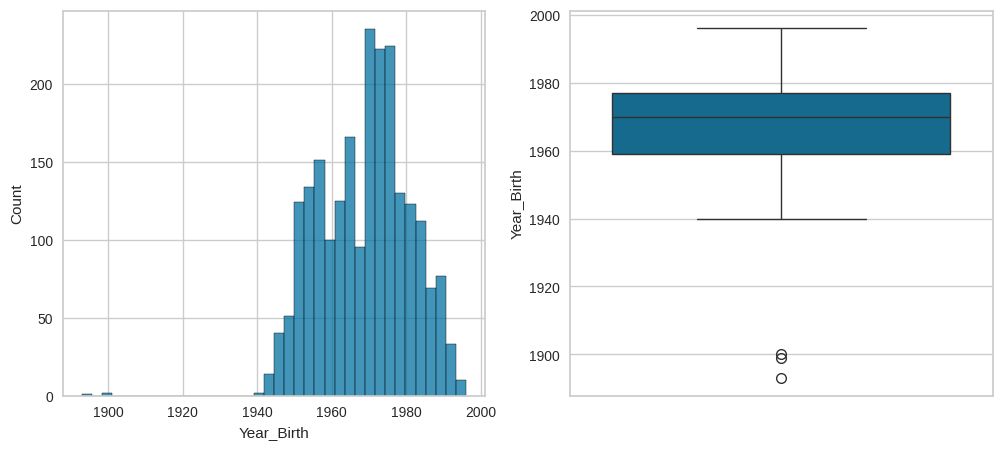

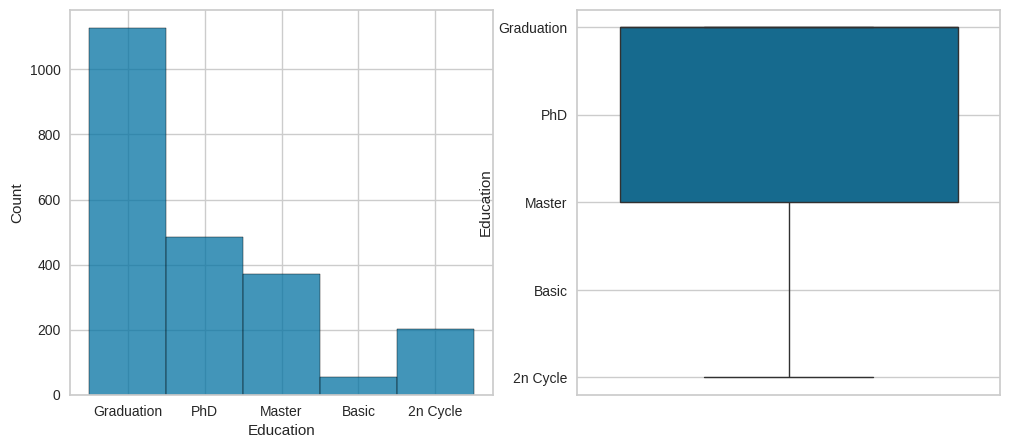

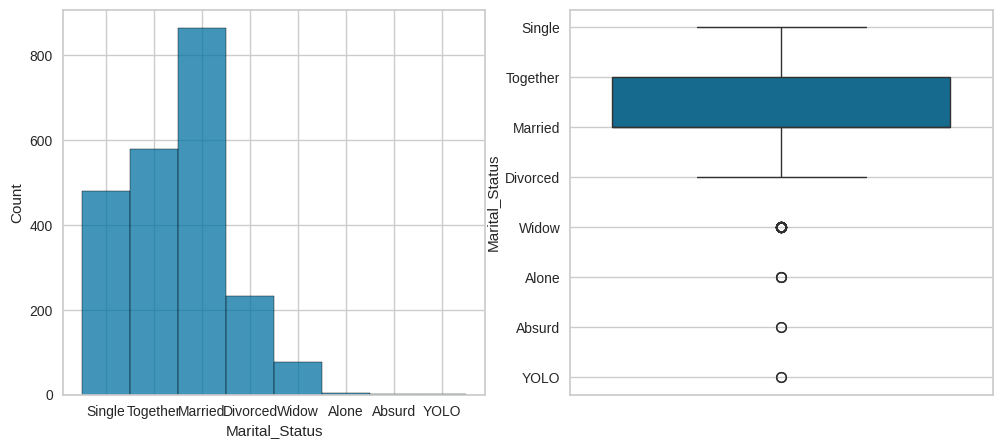

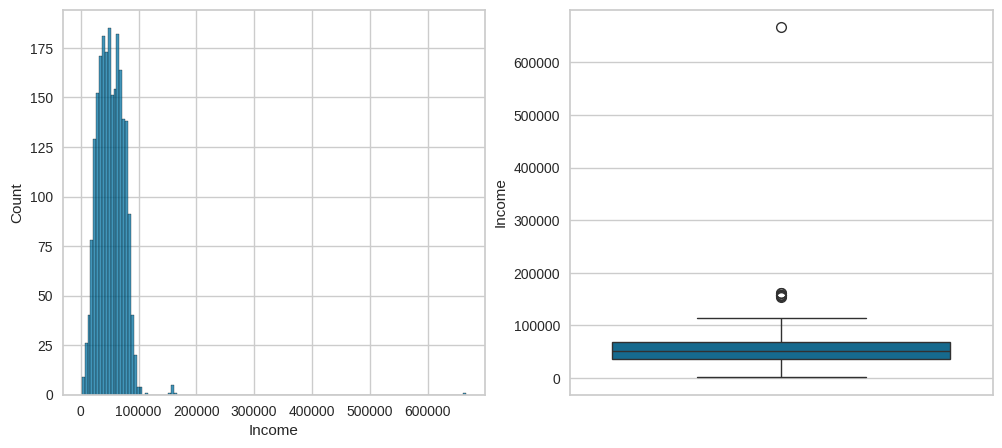

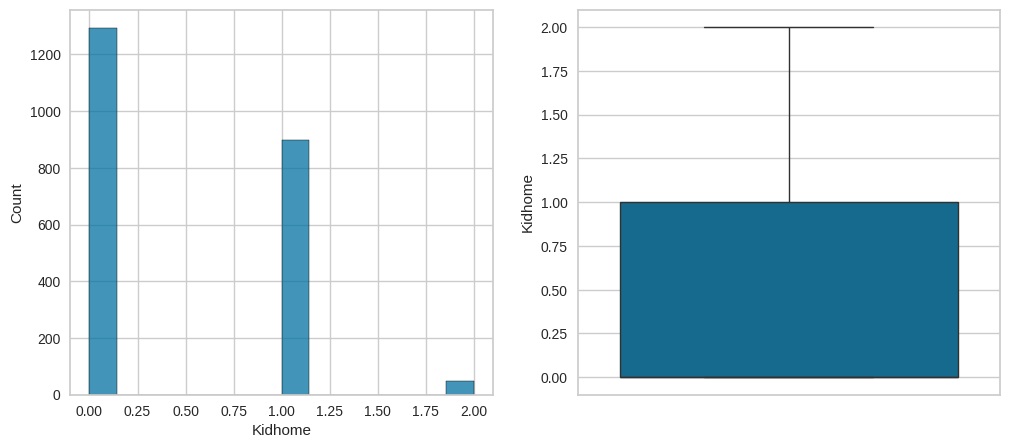

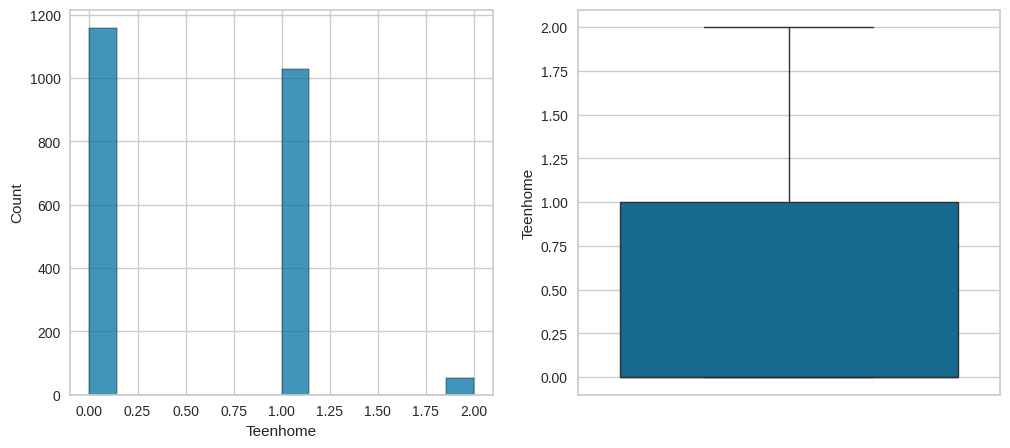

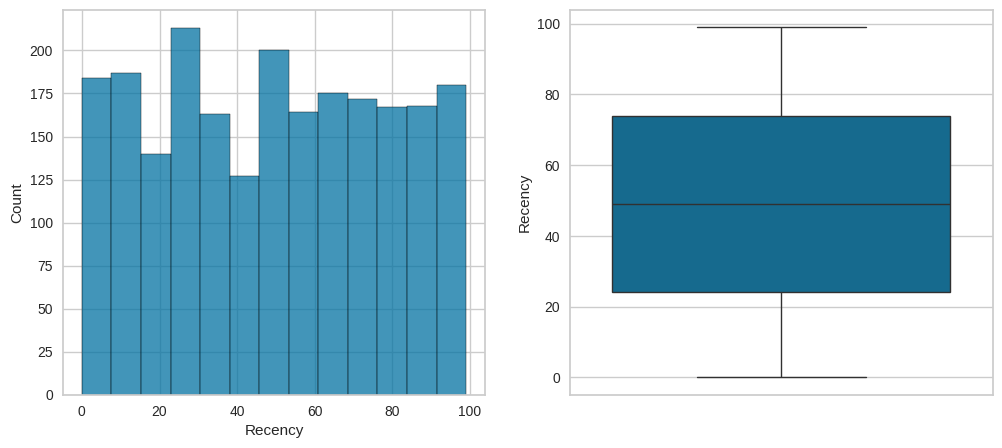

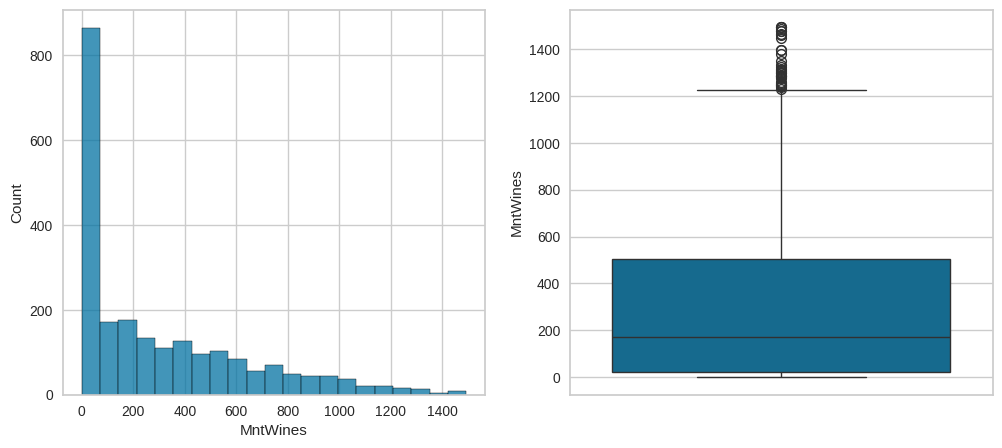

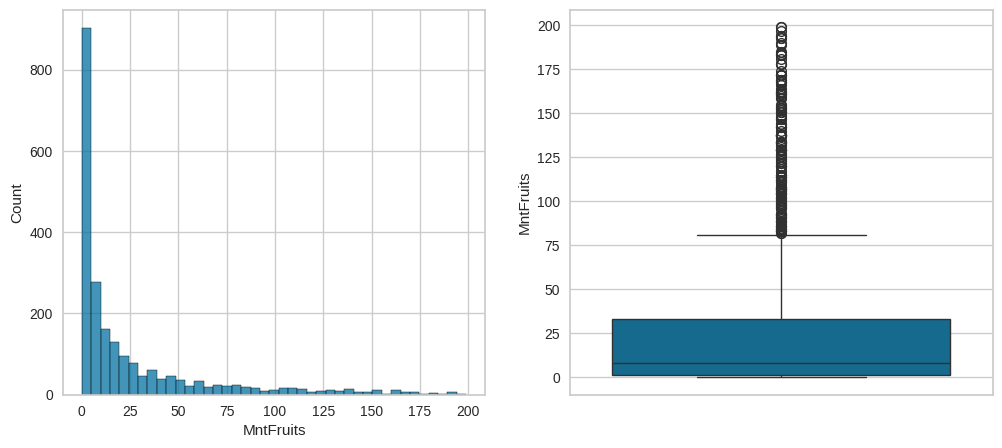

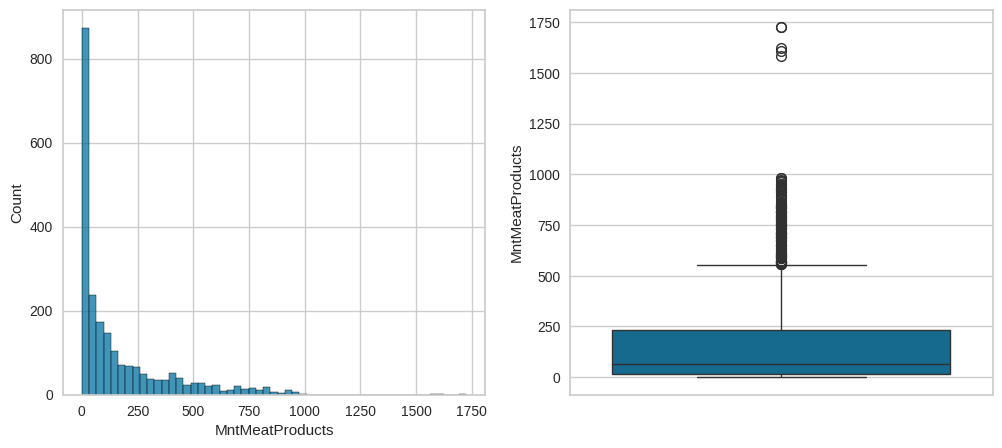

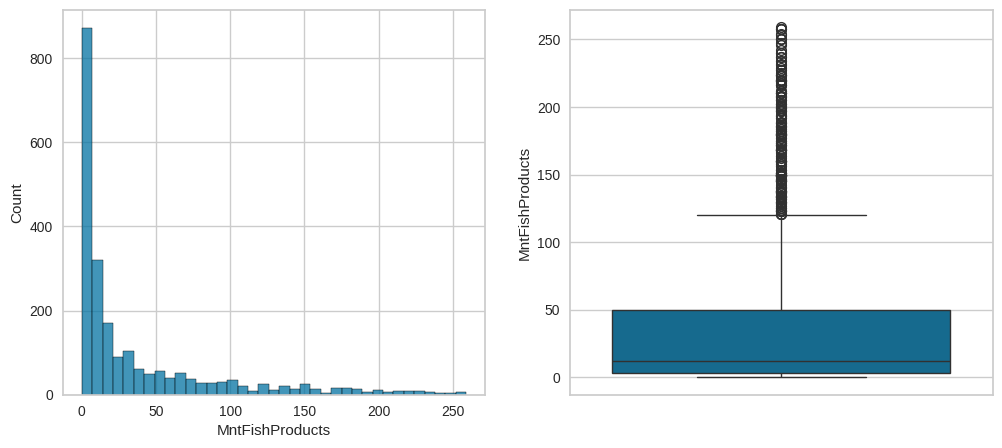

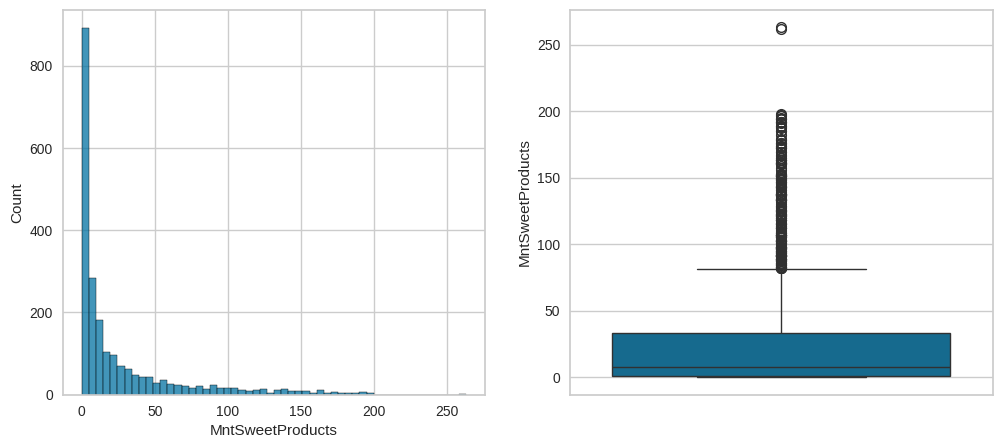

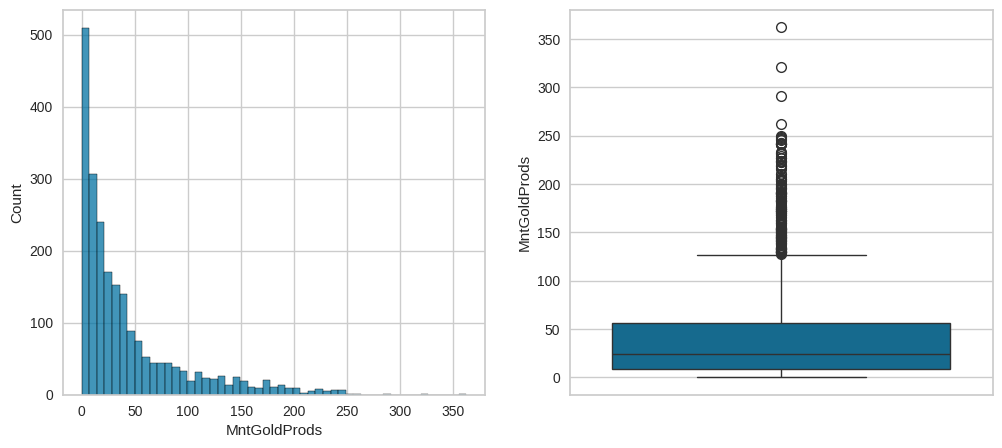

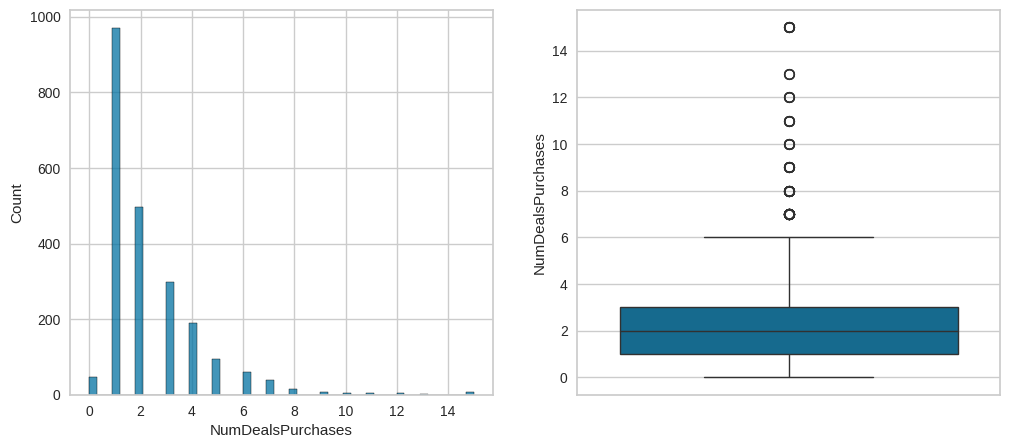

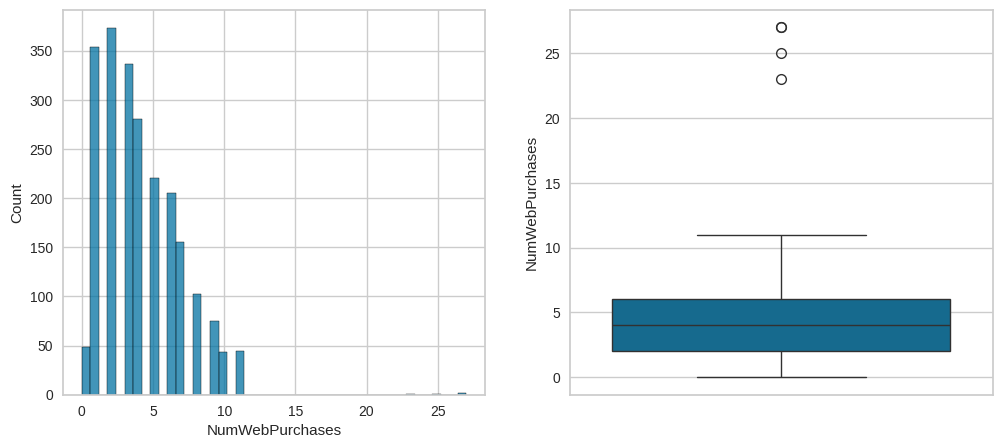

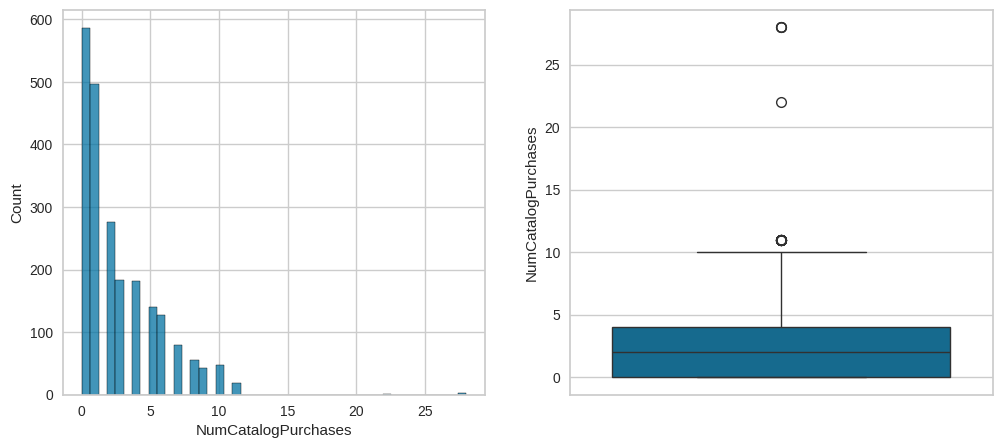

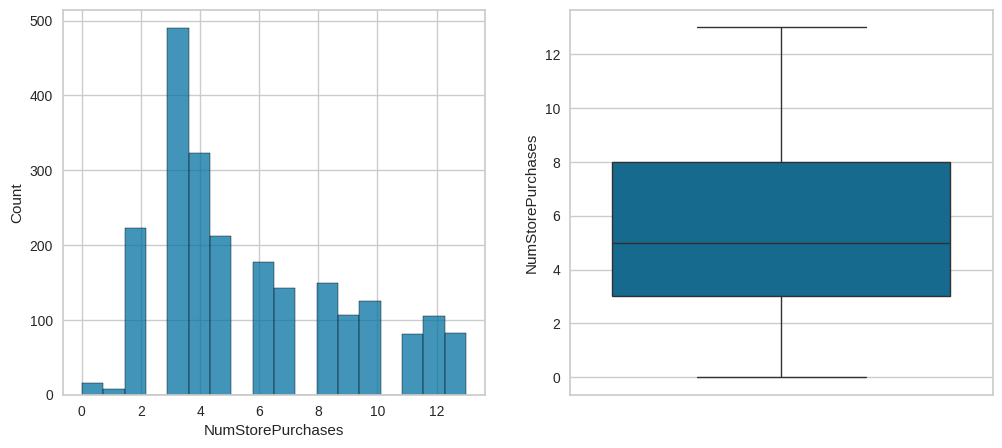

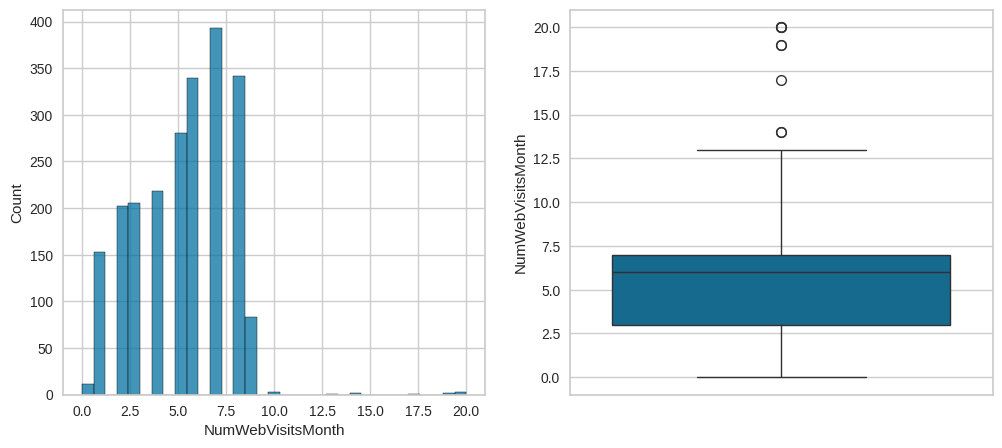

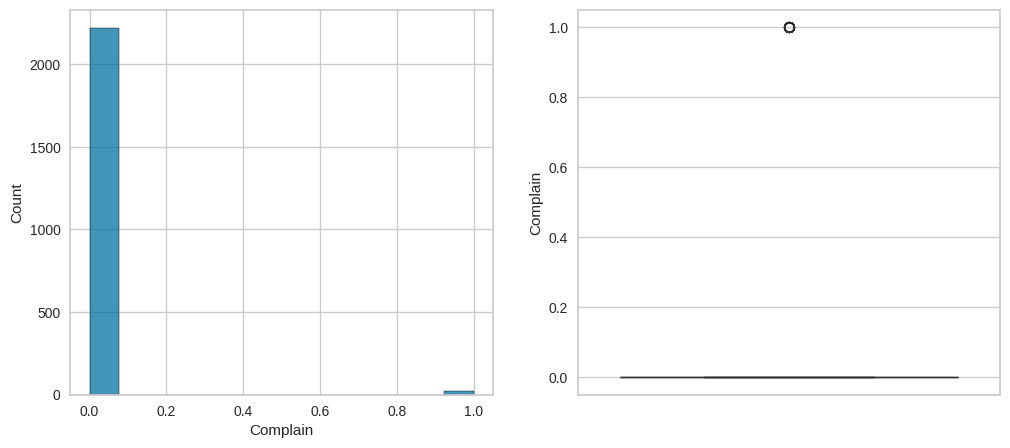

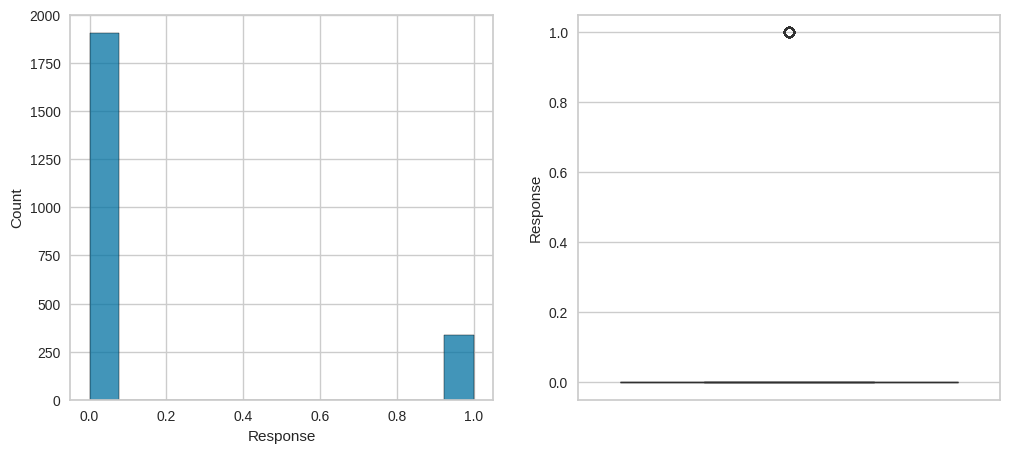

In [36]:
for columns in data.columns:
  fig, axes = plt.subplots(1, 2, figsize=[12, 5])
  sns.histplot(data[columns], ax=axes[0])
  sns.boxplot(data[columns], ax=axes[1])
  plt.show

##### **Observations:**

Now that we have computed individual graphs for every (useful) column, we can start to see the raw data turn into essential information that, just by itself, will tell us a lot about the customer base.

For example, just by having a quick peek at the graphs, we can already tell that most customers were born in around 1970, most customers have graduated, most customers are married, etc.

However, while having this form of analysis is useful, it's nowhere near enough to make accurate assessments of the customer profiles in the store. Which leads us nicely to bivariate and multivariate analysis.

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [38]:
data["Education"] = LabelEncoder().fit_transform(data["Education"])
data["Marital_Status"] = LabelEncoder().fit_transform(data["Marital_Status"])

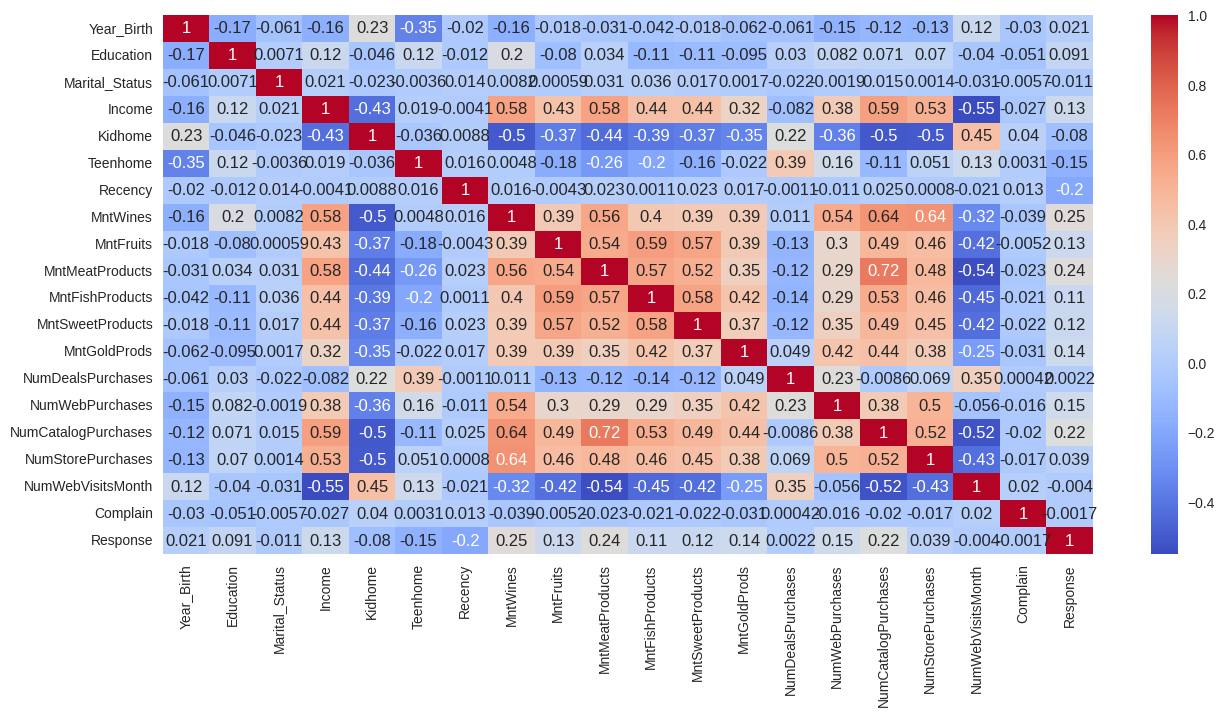

In [39]:
plt.figure(figsize=[15,7])
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

In [40]:
data_scaled = StandardScaler().fit_transform(data)

In [41]:
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

In [42]:
PCA = PCA(n_components=2)
data_pca = PCA.fit_transform(data_scaled)

In [43]:
data_pca_df = pd.DataFrame(data_pca, columns=["PC1", "PC2"])

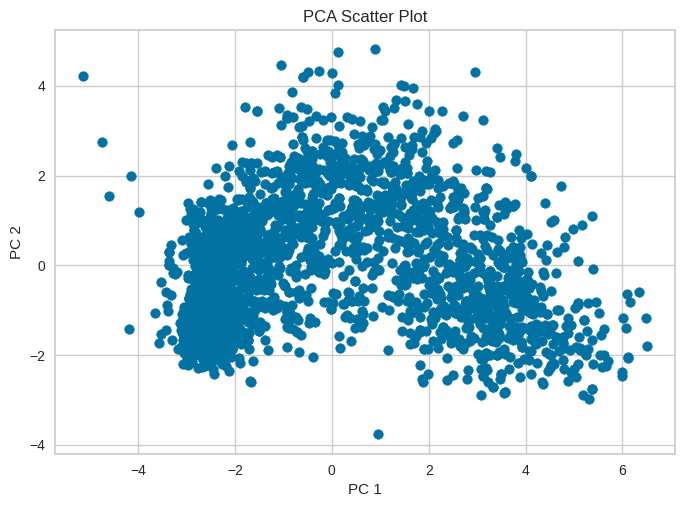

In [44]:
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA Scatter Plot")
plt.show()

##### **Observations:**

Okay, this might seem like a lot to take in, but it really isn't. We start off by giving the "Marital_Status" and "Education" columns a numerical value, this is so we can actually compare its correlation to other values. A heatmap is then created to compare every possible 2-column combination and giving a value as for the correlation they might have. It goes like this: the closer the number is to 1, the higher the correlation; however, if it's closer to -1, it means it not only has a lower correlation, but that it's a negative correlation. This implies that as the value x increases, y decreases.

For example, we can see that in most comparisons, when "Income" is put up against the "Mnt" columns, it tends to have a more positive correlation, implying that as people have more money in general, they will spend more and more time at the wine, fish, meat, sweet, fruit, and gold isles.

After this, the data is then converted to have the same range. This was made so that we could run the PCA dimentionality reduction and not have the complications of comparing values with totally different units. The PCA dimentionality reduction though, after being visualized, just shows us a huge blob of information that --If left unattended-- we can do absolutely nothing with.

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

In [45]:
inertia = []
for k in range (1, 11):
  kmeans = KMeans(n_clusters = k, random_state=35)
  kmeans.fit(data_pca)
  inertia.append(kmeans.inertia_)

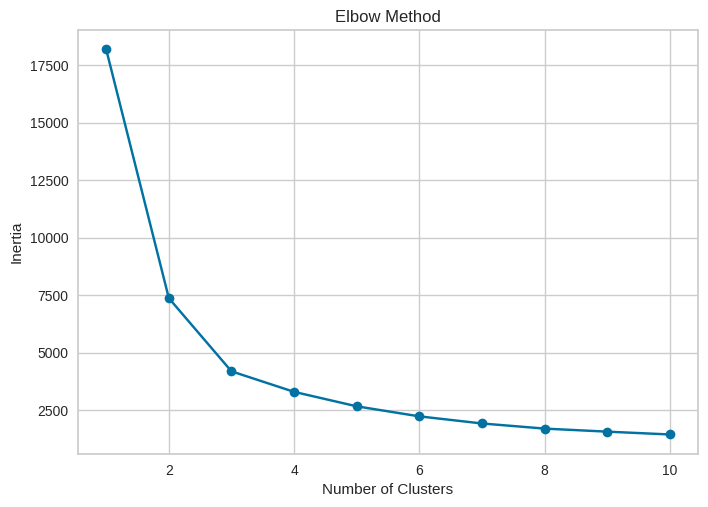

In [46]:
plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

##### **Observations:**

We now have to find the optimal amount of clusters to divide the data into. This is done by applying the infamous "Elbow method" which is basically just a graph that takes an elbow shape. This graph gives us the optimal amount of clusters, which is observable by checking when the graph starts decreasing the least (In this case, 2 or 3.)

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

In [47]:
from sklearn.metrics import silhouette_score

In [48]:
score = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=35)
  clusters = kmeans.fit_predict(data_pca)
  silhouette = silhouette_score(data_pca, kmeans.labels_)
  score.append(silhouette)
score

[np.float64(0.5261873567548537),
 np.float64(0.5016799585566277),
 np.float64(0.43182077464467106),
 np.float64(0.39171074730682626),
 np.float64(0.390401331067987),
 np.float64(0.39746659549062824),
 np.float64(0.39759055102641777),
 np.float64(0.3884272132836493),
 np.float64(0.3914933871560857)]

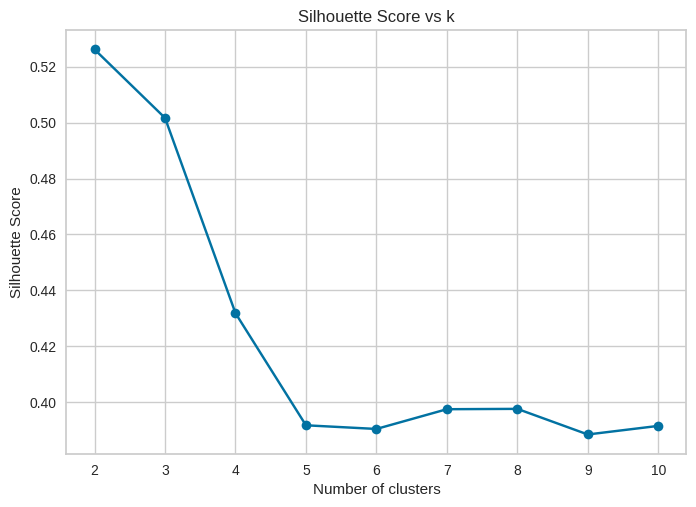

In [49]:
plt.plot(range(2, 11), score, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title('Silhouette Score vs k')
plt.show()

##### **Observations:**

Now we corroborate the results of the elbow method by running the silhouette scores of different number of clusters, and seeing which number of clusters is the most optimal. Which was 2 in this case.

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

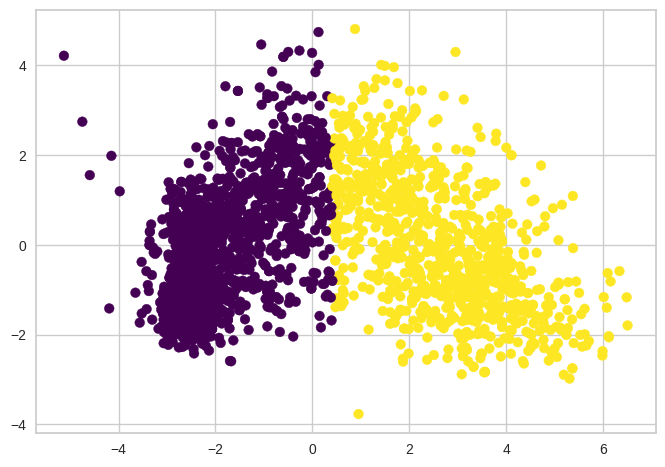

In [50]:
kmeans = KMeans(n_clusters=2, random_state=35)
clusters = kmeans.fit_predict(data_pca)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap="viridis")
plt.show()

##### **Observations:**

After determining that the optimal number of clusters is 2, we graphed the data with the adequate number of clusters. However, the data is still just a bunch of blobs of information, that we can interpret nothing out of.

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

In [51]:
data_scaled_df["Cluster"] = clusters

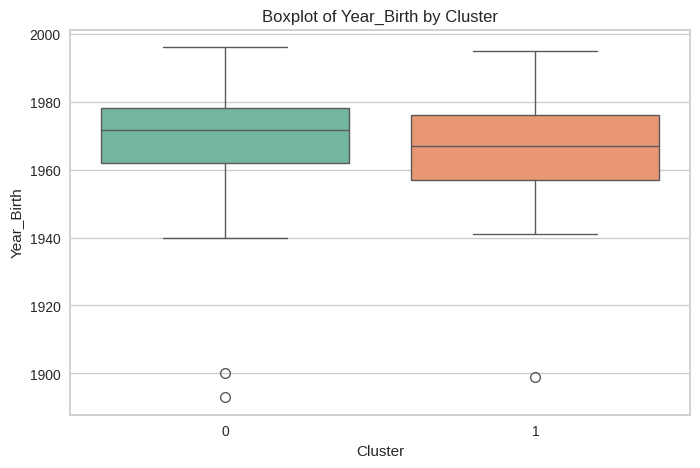

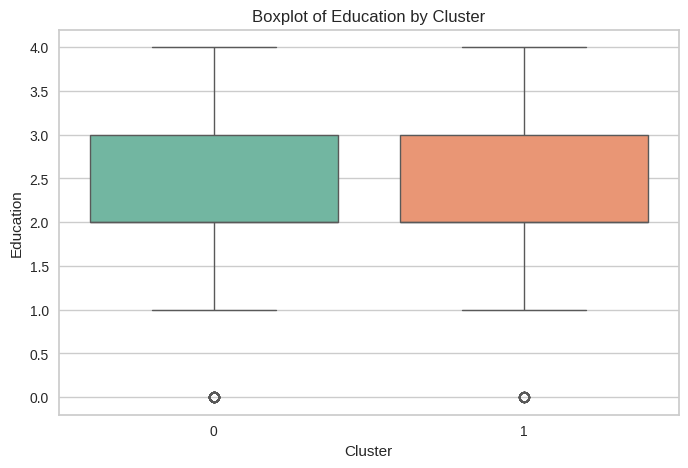

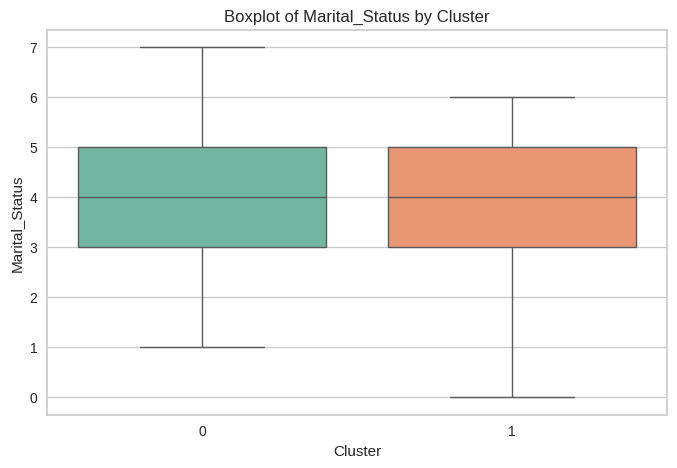

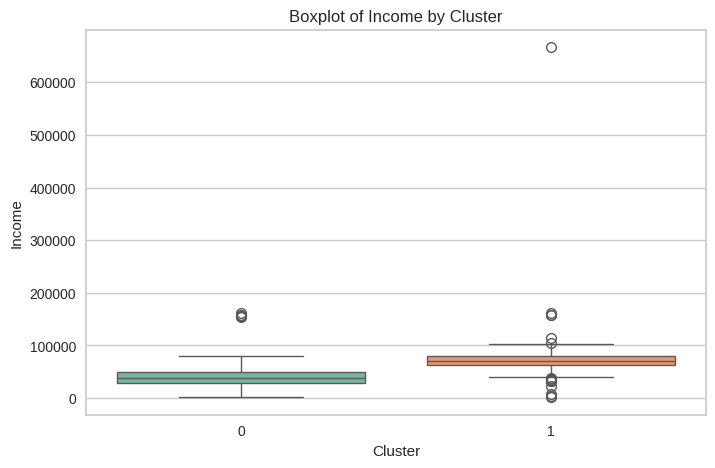

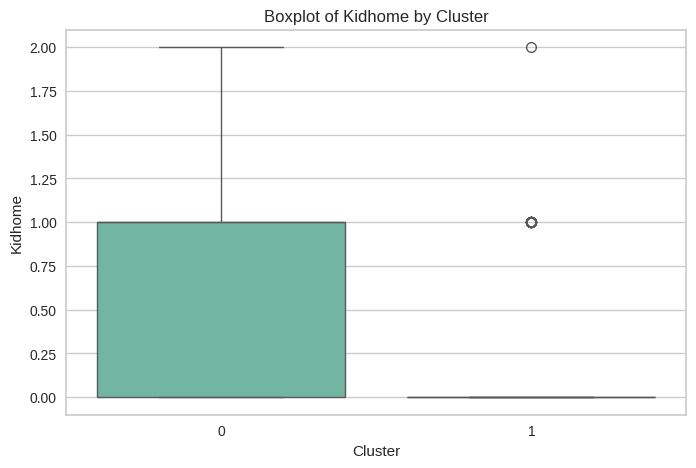

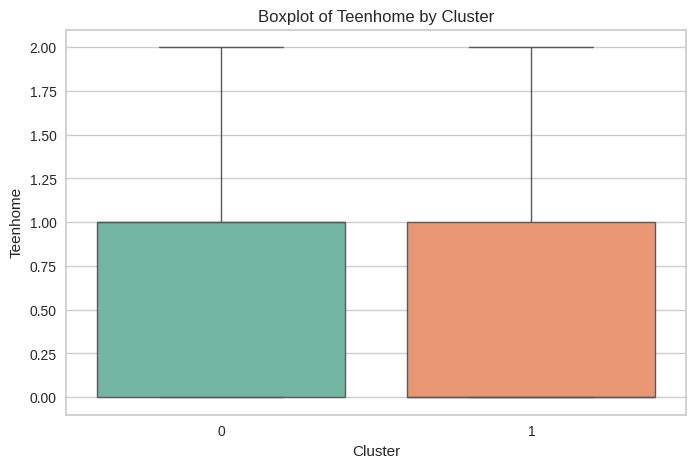

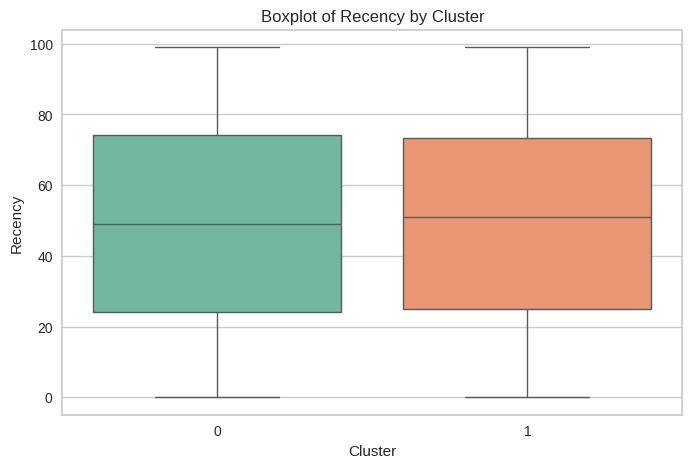

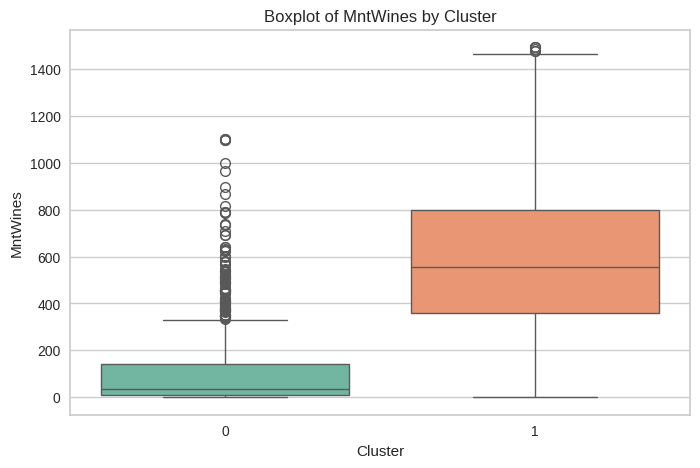

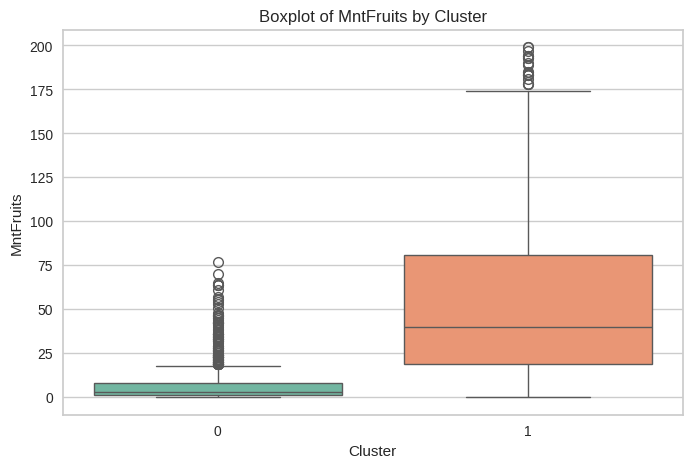

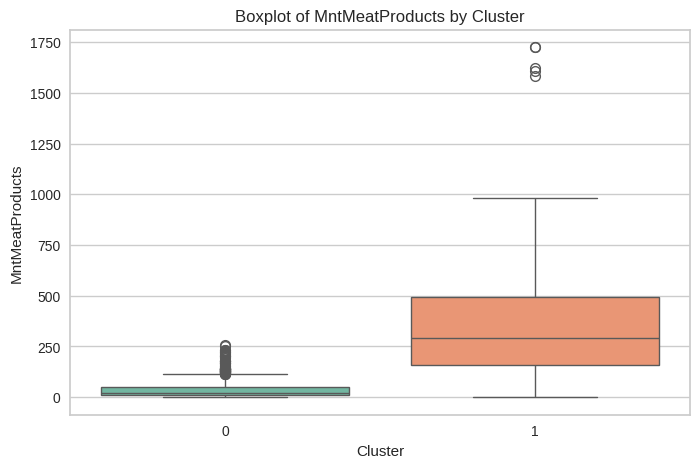

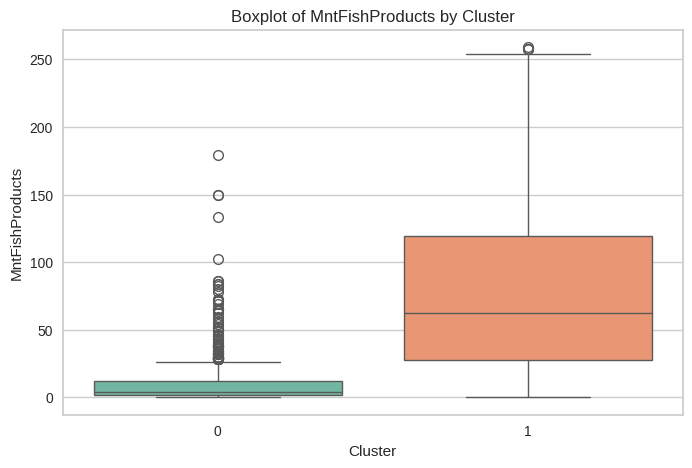

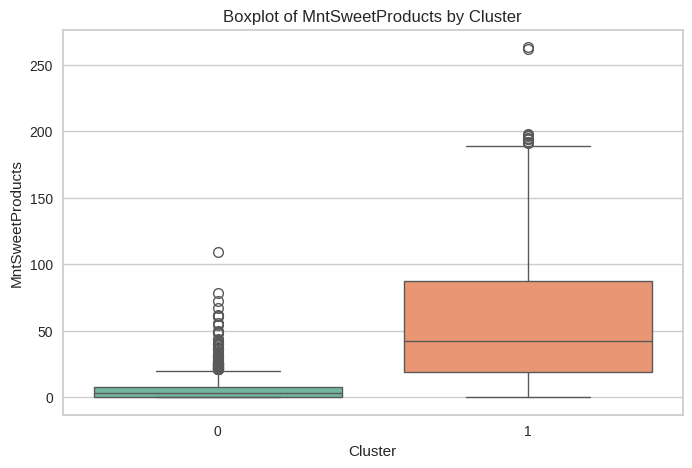

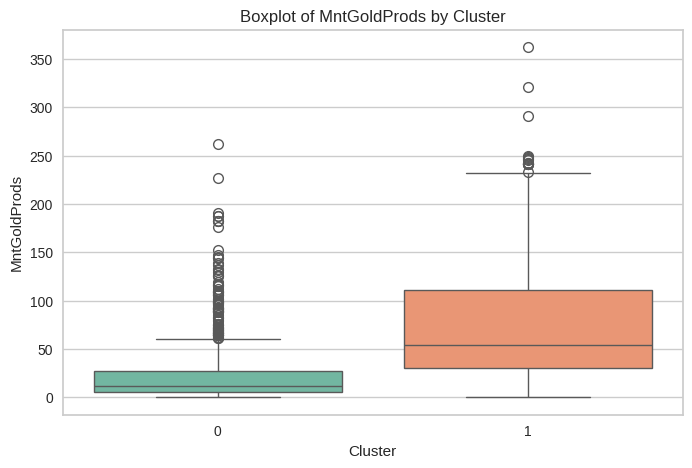

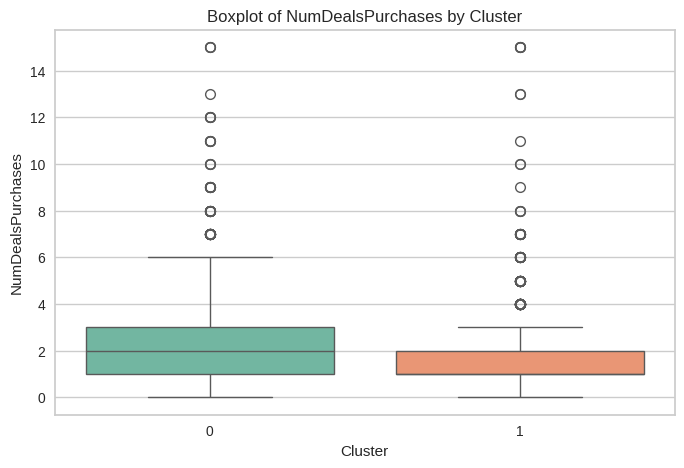

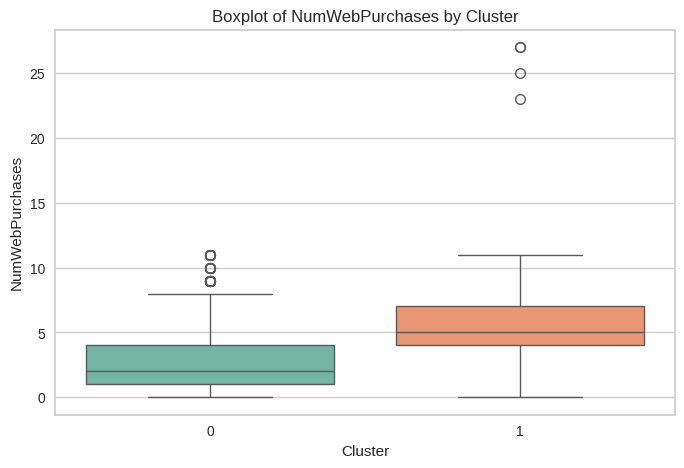

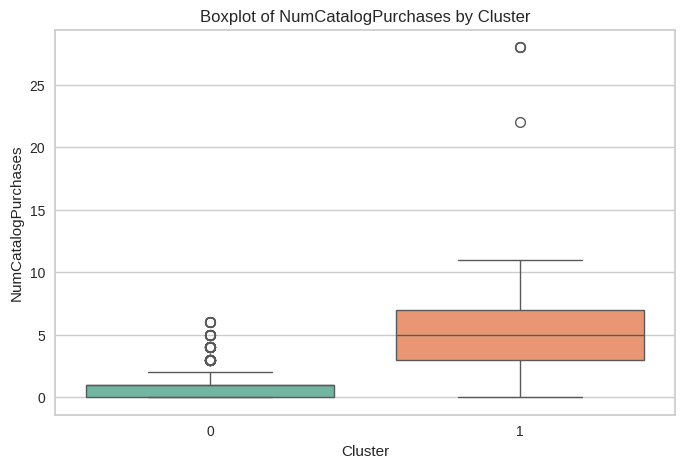

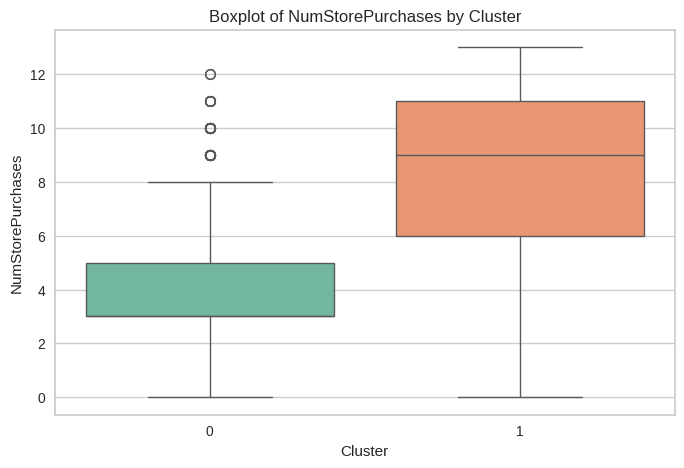

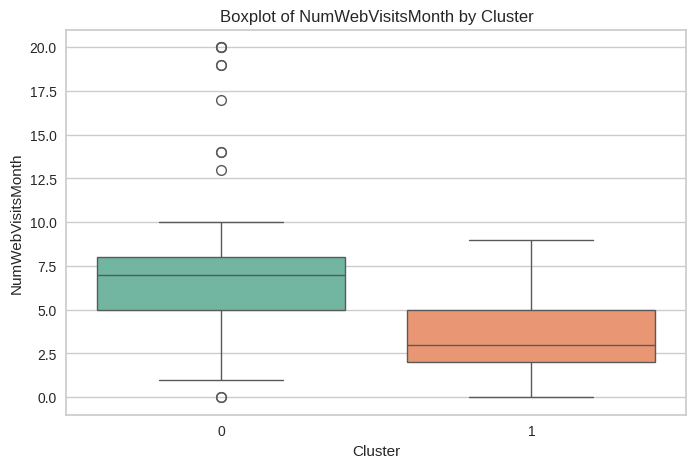

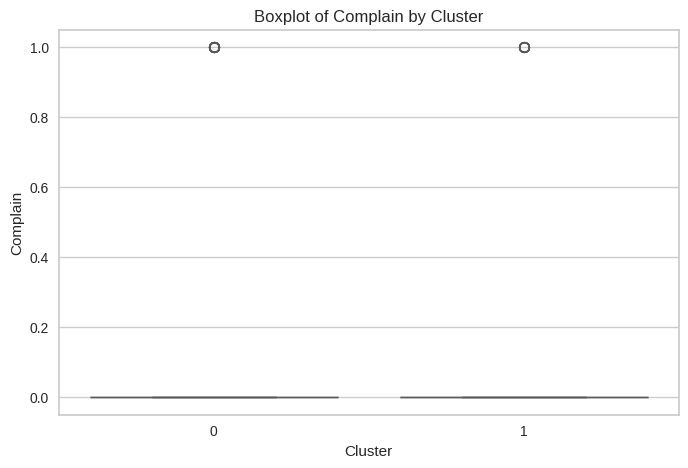

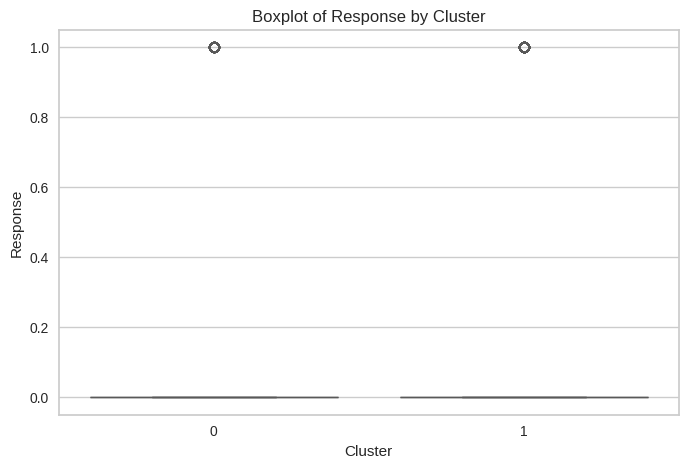

In [52]:
for column in data_scaled_df.drop(columns=["Cluster"]).columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data_scaled_df['Cluster'], y=data[column], palette="Set2")
    plt.xlabel("Cluster")
    plt.ylabel(column)
    plt.title(f"Boxplot of {column} by Cluster")
    plt.show()

##### **Observations:**

Now we've gotten to the good stuff, the graphs. A new column was added to represent which cluster each row belonged to. This was then used to make a simple boxplot for each column, providing visualization for the values in them and comparing them against the clusters they belong to.

Here we start to notice certain customer profiles; for instance, we can tell that on cluster 0, is where the median salary is the lowest. We can also tell that in that same cluster, people tend to have a little less recency, usually one child and/or one teenager, and overall less minutes spent on every isle. The exact opposite is true for cluster 1.

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

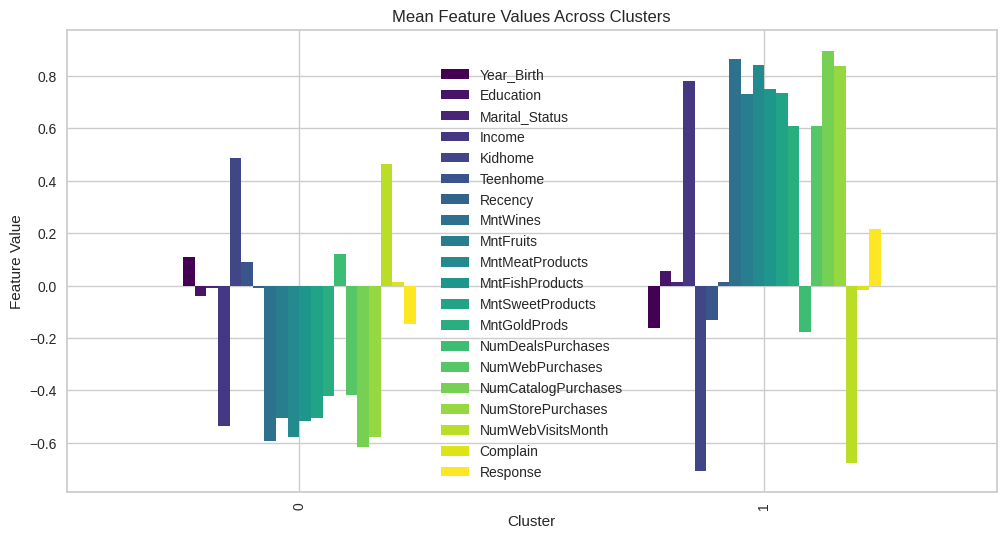

In [59]:
cluster_summary = data_scaled_df.groupby("Cluster").mean()
cluster_summary.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Mean Feature Values Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Feature Value")
plt.legend(loc="best")
plt.show()

##### **Observations:**

After comparing the features of each cluster side by side in a barplot, it is clear that our former analysis is most likely true, as it matches almost perfectly with this other type of visualization.

## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

Now that we have a clear idea of how many different customer profiles we have, and how they vary from one another, we can proceed with the adequate business recommendations.


**For our first customer profile, cluster 0:**

*This cluster represents our price-sensitive customers, they typically earn less on average than the other cluster, have more kids, have less recency, complain more, visit the website more often, and make more purchases using discounts or coupons.*

***What should be our business strategy with them?***

- Send them personalized discounts or special offers to bring them back to
the store more often.
- Improve customer service by addressing their complaints and enhancing their overall satisfaction in the store.
- Promote and encourage repeat purchases by adding convenience-based subscriptions and offers.


**And for our second customer profile, cluster 1:**

*This cluster represents the high-value customers, they have the highest salaries, least amount of kids/teens, most recency, by far the most time spent in isles, the most purchases in the website, catalogue, and in-store. They also care less in average about purchasing items with discounts.*

***What should be our business strategy with them?***

- Offer VIP membership programs, early access to new/premium products.
- Reward them with exclusive deals via a loyalty program.
- Add gourmet and organic product lines, high-income individuals value their health highly.